# Python Portfolio

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12,8]

# Data

df = pd.read_csv(r'C:\Users\derri\Desktop\movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Checking if Dataset has missing Data
for col in df.columns:
    
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
# Filling in [NA] missing data 

df['budget'] = df['budget'].fillna(df['budget'].mode()[0])

df['gross'] = df['gross'].fillna(df['gross'].mode()[0])

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
# Finding each column's Dtypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Converting Dtypes

#df['budget'] = df.budget.astype('Int64')
#df['gross'] = df.gross.astype('Int64')

df['budget'] = df.budget.astype(dtype=('int64'))
df['gross'] = df.gross.astype(dtype=('int64'))

# Can't turn them into 'int64' because they have <NA> values - Solution: Turn '<NA>' values in numerical values

In [57]:
# renaming columns

df.rename(columns={'released':'date_released', 'year':'year_released'}) # ,inplace = True)

name  rating  genre  year_released  date_released  score      votes  \
0     6587       6      6           1980           1705    8.4   927000.0   
1     5573       6      1           1980           1492    5.8    65000.0   
2     5142       4      0           1980           1771    8.7  1200000.0   
3      286       4      4           1980           1492    7.7   221000.0   
4     1027       6      4           1980           1543    7.3   108000.0   
...    ...     ...    ...            ...            ...    ...        ...   
7663  3705      -1      6           2020           2964    3.1       18.0   
7664  1678      -1      4           2020           1107    4.7       36.0   
7665  4717      -1      6           2020            193    5.7       29.0   
7666  2843      -1      6           2020           2817    NaN        NaN   
7667  5394      -1     10           2020            391    5.7        7.0   

      director  writer  star  country    budget      gross  company  runtime  
0         2589    4014  1047       54  19000000   46998772     2319    146.0  
1         2269    1632   327       55   4500000   58853106      731    104.0  
2         1111    2567  1745       55  18000000  538375067     1540    124.0  
3         1301    2000  2246       55   3500000   83453539     1812     88.0  
4         1054     521   410       55   6000000   39846344     1777     98.0  
...        ...     ...   ...      ...       ...        ...      ...      ...  
7663      1500    2289  2421       55      7000       <NA>       -1     90.0  
7664       774    2614  1886       55      <NA>       <NA>      539     90.0  
7665      2061    2683  2040       55     58750       <NA>      941      NaN  
7666      1184    1824   450       55     15000       <NA>       -1    120.0  
7667      2165    3344  2463       44      <NA>       <NA>     1787    102.0  

[7668 rows x 15 columns]

In [71]:
# dropping (deleting) columns

df.drop(columns={'Year_Corrected'}, inplace=True)

In [92]:
# Sorting by Descending 'Gross'

df.sort_values(by=['gross'], inplace=False, ascending=False)

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

In [73]:
pd.set_option('display.max_rows', None)

In [74]:
# Dropping Duplicated columns

df['company'].drop_duplicates().sort_values(ascending=False) # To drop any duplicates: df.drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

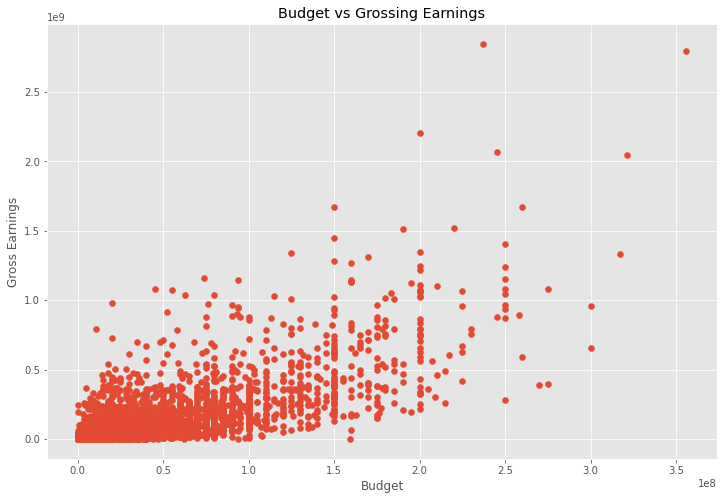

In [13]:
# Comparisons: Creating Scatter Plot - Gross vs Budget

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Grossing Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [14]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

<AxesSubplot:xlabel='budget', ylabel='gross'>

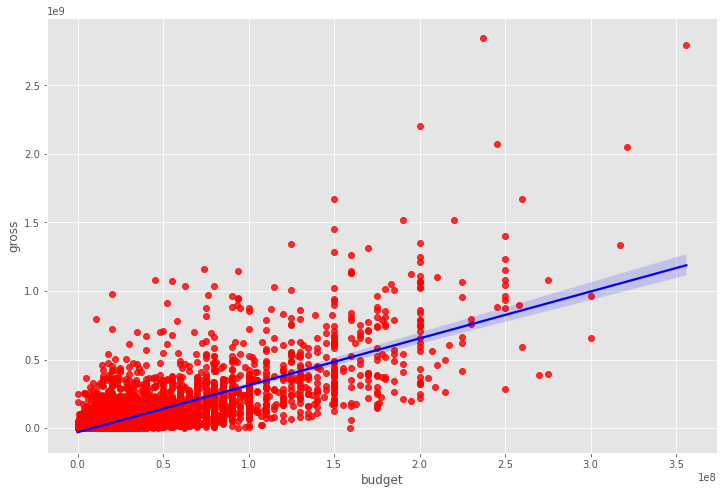

In [14]:
#Comparisons: Creating Plot - Budget vs Gross

sns.regplot(x='budget',y='gross',data=df, 
            scatter_kws={'color':'red'}, 
            line_kws={'color':'blue'})

In [16]:
df.corr(method='pearson') # pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

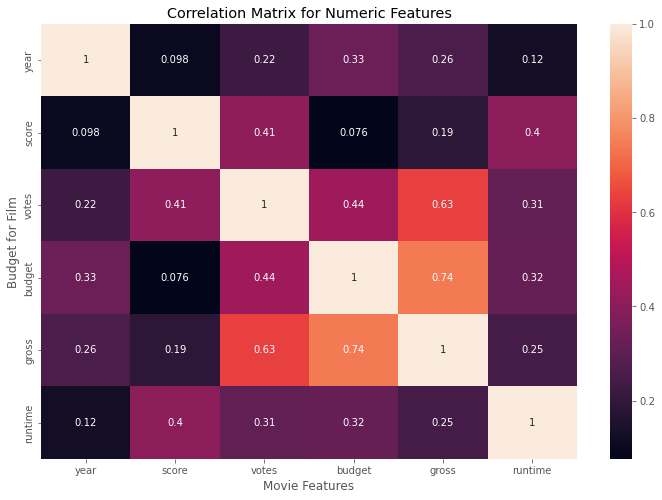

In [17]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')

plt.show()

In [18]:
#Company Column

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country    budget        gross  company  runtime  
0  1047       54  19000000   46998772.0     2319    146.0  
1   327       55   4500000   58853106.0      731    104.0  
2  1745       55  18000000  538375067.0     1540    124.0  
3  2246       55   3500000   83453539.0     1812     88.0  
4   410       55   6000000   39846344.0     1777     98.0

In [20]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country    budget        gross  company  runtime  
0  1047       54  19000000   46998772.0     2319    146.0  
1   327       55   4500000   58853106.0      731    104.0  
2  1745       55  18000000  538375067.0     1540    124.0  
3  2246       55   3500000   83453539.0     1812     88.0  
4   410       55   6000000   39846344.0     1777     98.0

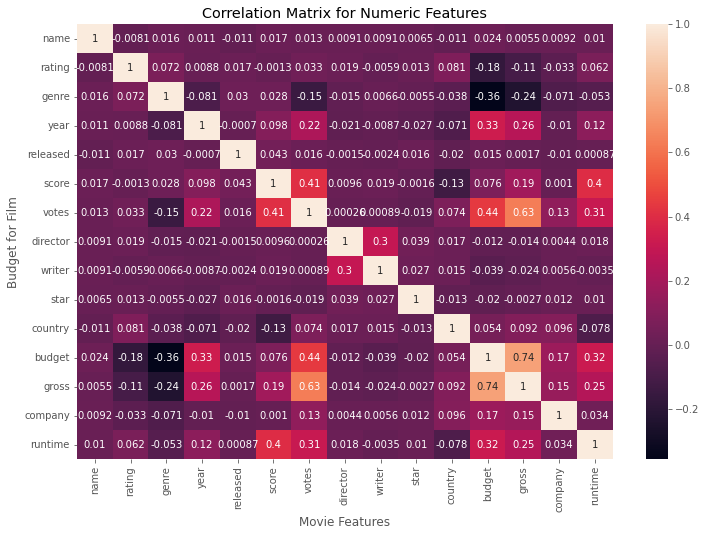

In [21]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')

plt.show()

In [22]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64